In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm

In [148]:
h=1
m=1
w=1

In [272]:

dx= 0.02
dt =(dx**2)/2
t0=0
tf=1
x0=-1
xf=1
ts=np.arange(t0,tf,dt)
xs=np.arange(x0,xf,dx)
Nx=len(xs)
N=len(ts)

X,T=np.meshgrid(xs,ts)




In [273]:
#########################Condiciones iniciales
#u0=np.sin(ts)
#u0=np.exp(-ts**2)
#u0=1/np.cosh(xs)
u0=np.zeros(Nx)
u0[int(Nx/2)+40]=10000
us=np.ones((N,Nx))*0j
us[0]=u0

In [274]:

#us=np.vstack((us,u0+dt*f(u0)))
us[1]=u0+dt*f(u0,xs)
###us[1]=us[0]+(dt/6)*()
for i in range(1,N-1):
    #us=np.vstack((us,2*dt*f(us[i])+us[i-1]))
    us[i+1]=(2*dt*f(us[i],xs)+us[i-1])

#fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
#ax.scatter(T,X,us)
#surf=ax.plot_surface(T, X, np.real(us),cmap=cm.coolwarm,
                       #linewidth=0, antialiased=False)



C:\Users\Arif\AppData\Local\Temp\ipykernel_8568\126919249.py:6: RuntimeWarning: overflow encountered in scalar divide
  yp[i]=(y[i+1]-2*y[i]+y[i-1])/dt**2
C:\Users\Arif\AppData\Local\Temp\ipykernel_8568\1675759386.py:4: RuntimeWarning: invalid value encountered in multiply
  return (((1j*h)/2*m)*df2(u,dx)-(1j/h)*V(xs)) ###derivada de tiempo 2
C:\Users\Arif\AppData\Local\Temp\ipykernel_8568\251626039.py:6: RuntimeWarning: invalid value encountered in multiply
  us[i+1]=(2*dt*f(us[i],xs)+us[i-1])


# Graficar

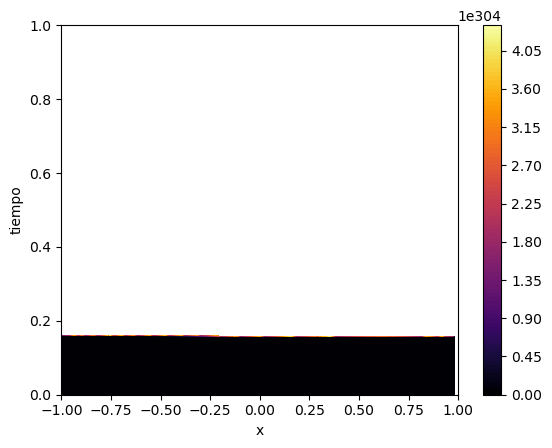

In [281]:
surf=plt.contourf(X,T,np.abs(us),levels=100,cmap='inferno')
plt.colorbar(surf)
plt.xlabel("x")
plt.xlim([x0,xf])
plt.ylim([t0,tf])
plt.ylabel("tiempo")
#plt.axis('equal')
plt.show()

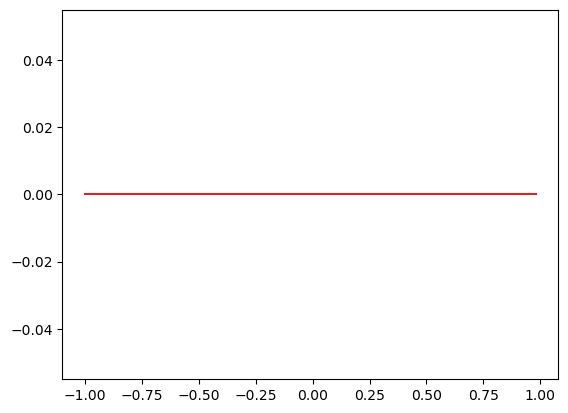

In [280]:
jj=-1
plt.plot(xs,np.real(us[jj]))
plt.plot(xs,np.imag(us[jj]))
plt.plot(xs,np.abs(us[jj])**2)
plt.plot(xs,V(xs))

$$i\hbar\frac{\partial \Psi}{\partial t}=-\frac{\hbar^2}{2m}\frac{\partial^2\Psi}{\partial x^2}+V(x)\Psi$$
$$\frac{\partial \Psi}{\partial t}=i\frac{\hbar}{2m}\frac{\partial^2\Psi}{\partial x^2}-\frac{i}{\hbar}V(x)\Psi$$

In [268]:
def V(x):
    return 0*xs#((1/2)*w**2*m*x**2) ###derivada de tiempo 2
def f(u,xs):#LSE
    return (((1j*h)/2*m)*df2(u,dx)-(1j/h)*V(xs)) ###derivada de tiempo 2

In [75]:
#def f(u):##NLSE
#    return 1j*((u)*np.conj(u)*u+(1/2)*df2(u,dt)) ###derivada de tiempo 2

# Diferencias finitas centrada para segundo orden

In [99]:
def df2(y,dt):
    y=y*1j
    N=len(y)
    yp=np.zeros(N)*0j
    for i in range(1,N-1):
        yp[i]=(y[i+1]-2*y[i]+y[i-1])/dt**2
    yp[0]=yp[1]
    yp[-1]=yp[-2]
    return yp

In [177]:
#def df(y,dt):
  #  t=np.arange(ti,tf,dt)
   # n=len(y)
    #v1=np.ones(n-1)*(1/2)
    #v2=np.ones(n-1)*(-1/2)
    #D=(np.diag(v1,k=1)+np.diag(v2,k=-1))/dt
    #yp=np.matmul(D, y)
    #yp[0]=yp[1]
    #yp[-1]=yp[-2]
    #return yp